<a href="https://colab.research.google.com/github/mhsefidgar/Generative-AI/blob/main/Advanced_Paint_by_Example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 🎨✨ Paint-by-Example Magic: Transform Images Like an AI Artist! 🖌️🧠
# This script uses the Paint-by-Example diffusion model to replace parts of an image
# based on a reference example — think "smart inpainting" powered by AI creativity! 🚀


In [ ]:
# Install dependencies (if running in a new environment, e.g. Google Colab)
!pip install diffusers transformers accelerate torch torchvision safetensors --quiet
!pip install Pillow matplotlib requests --quiet


Loading pipeline components...:   0%|          | 0/5 [00:00<?, ?it/s]

You are using a model of type clip_vision_model to instantiate a model of type clip. This is not supported for all configurations of models and can yield errors.
An error occurred while trying to fetch /root/.cache/huggingface/hub/models--Fantasy-Studio--Paint-by-Example/snapshots/351e6427d8c28a3b24f7c751d43eb4b6735127f7/vae: Error no file named diffusion_pytorch_model.safetensors found in directory /root/.cache/huggingface/hub/models--Fantasy-Studio--Paint-by-Example/snapshots/351e6427d8c28a3b24f7c751d43eb4b6735127f7/vae.
Defaulting to unsafe serialization. Pass `allow_pickle=False` to raise an error instead.
An error occurred while trying to fetch /root/.cache/huggingface/hub/models--Fantasy-Studio--Paint-by-Example/snapshots/351e6427d8c28a3b24f7c751d43eb4b6735127f7/unet: Error no file named diffusion_pytorch_model.safetensors found in directory /root/.cache/huggingface/hub/models--Fantasy-Studio--Paint-by-Example/snapshots/351e6427d8c28a3b24f7c751d43eb4b6735127f7/unet.
Defaulting to

  0%|          | 0/50 [00:00<?, ?it/s]

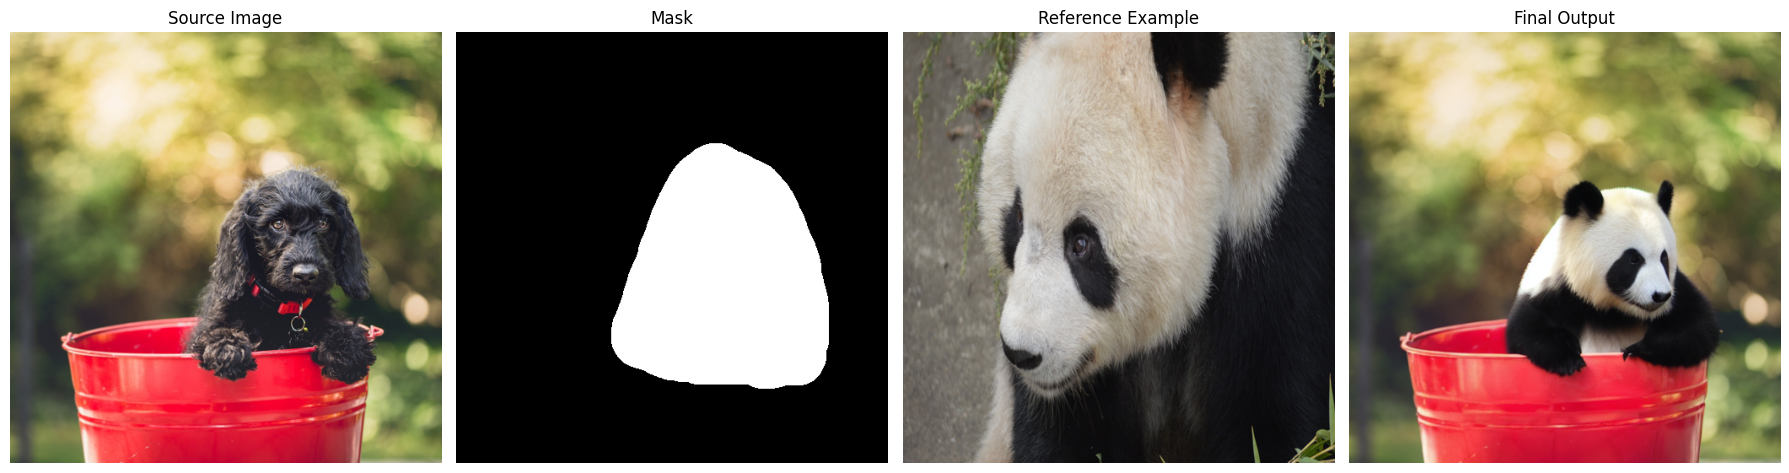

In [ ]:

from PIL import Image
import requests
from io import BytesIO
from diffusers import PaintByExamplePipeline
import matplotlib.pyplot as plt

# Helper to download and resize images
def load_image(url, size=(512, 512)):
    response = requests.get(url)
    img = Image.open(BytesIO(response.content)).convert("RGB")
    return img.resize(size)

# Load example images from the official repo
src_url = "https://raw.githubusercontent.com/Fantasy-Studio/Paint-by-Example/main/examples/image/example_1.png"
mask_url = "https://raw.githubusercontent.com/Fantasy-Studio/Paint-by-Example/main/examples/mask/example_1.png"
ref_url = "https://raw.githubusercontent.com/Fantasy-Studio/Paint-by-Example/main/examples/reference/example_1.jpg"

source_image = load_image(src_url)
mask_image = load_image(mask_url)
reference_image = load_image(ref_url)

# Load Paint-by-Example pipeline
pipe = PaintByExamplePipeline.from_pretrained(
    "Fantasy-Studio/Paint-by-Example",
    torch_dtype=torch.float16
).to("cuda")

# Run the inpainting process
result = pipe(
    image=source_image,
    mask_image=mask_image,
    example_image=reference_image
).images[0]

# Visualize all steps
fig, axs = plt.subplots(1, 4, figsize=(18, 5))
axs[0].imshow(source_image); axs[0].set_title("Source Image")
axs[1].imshow(mask_image); axs[1].set_title("Mask")
axs[2].imshow(reference_image); axs[2].set_title("Reference Example")
axs[3].imshow(result); axs[3].set_title("Final Output")
for ax in axs: ax.axis("off")
plt.tight_layout()
plt.show()


model_index.json:   0%|          | 0.00/498 [00:00<?, ?B/s]

Fetching 9 files:   0%|          | 0/9 [00:00<?, ?it/s]

config.json:   0%|          | 0.00/553 [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/518 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/877 [00:00<?, ?B/s]

scheduler_config.json:   0%|          | 0.00/346 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/524 [00:00<?, ?B/s]

image_encoder/pytorch_model.bin:   0%|          | 0.00/1.47G [00:00<?, ?B/s]

unet/diffusion_pytorch_model.bin:   0%|          | 0.00/3.44G [00:00<?, ?B/s]

vae/diffusion_pytorch_model.bin:   0%|          | 0.00/335M [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/5 [00:00<?, ?it/s]

An error occurred while trying to fetch /root/.cache/huggingface/hub/models--Fantasy-Studio--Paint-by-Example/snapshots/351e6427d8c28a3b24f7c751d43eb4b6735127f7/vae: Error no file named diffusion_pytorch_model.safetensors found in directory /root/.cache/huggingface/hub/models--Fantasy-Studio--Paint-by-Example/snapshots/351e6427d8c28a3b24f7c751d43eb4b6735127f7/vae.
Defaulting to unsafe serialization. Pass `allow_pickle=False` to raise an error instead.
An error occurred while trying to fetch /root/.cache/huggingface/hub/models--Fantasy-Studio--Paint-by-Example/snapshots/351e6427d8c28a3b24f7c751d43eb4b6735127f7/unet: Error no file named diffusion_pytorch_model.safetensors found in directory /root/.cache/huggingface/hub/models--Fantasy-Studio--Paint-by-Example/snapshots/351e6427d8c28a3b24f7c751d43eb4b6735127f7/unet.
Defaulting to unsafe serialization. Pass `allow_pickle=False` to raise an error instead.
You are using a model of type clip_vision_model to instantiate a model of type clip. T

  0%|          | 0/50 [00:00<?, ?it/s]

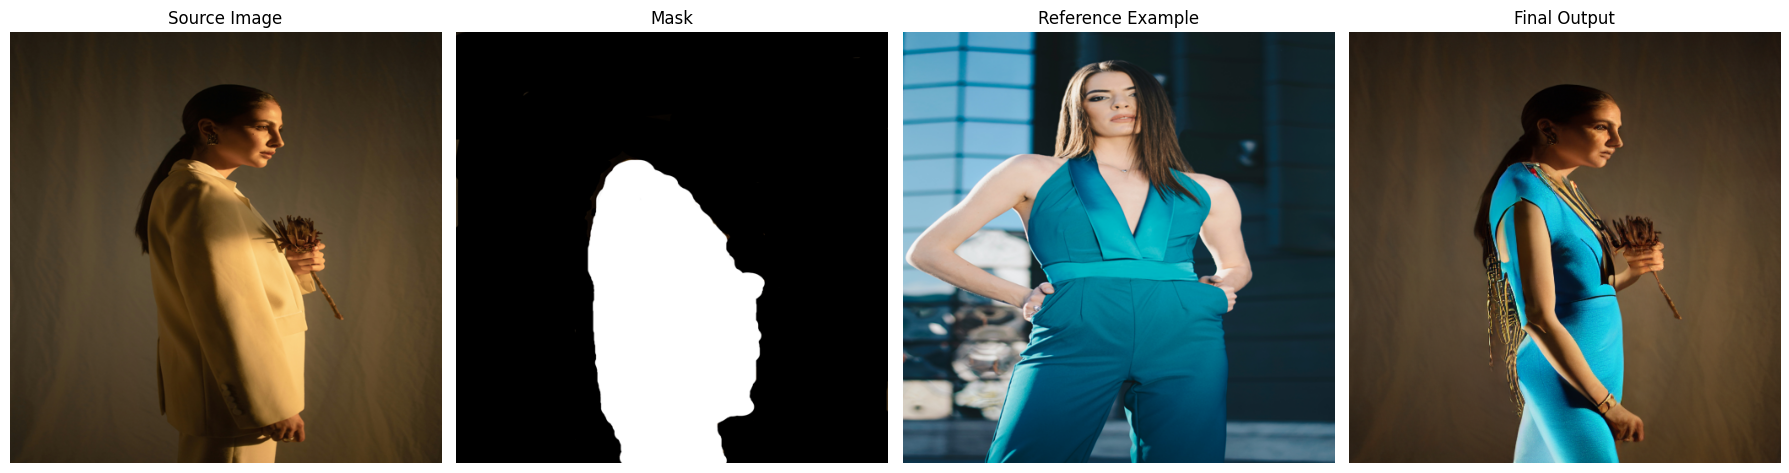

In [ ]:

from PIL import Image
import requests
from io import BytesIO
from diffusers import PaintByExamplePipeline
import matplotlib.pyplot as plt

# Helper to download and resize images
def load_image(url, size=(512, 512)):
    response = requests.get(url)
    img = Image.open(BytesIO(response.content)).convert("RGB")
    return img.resize(size)

# Load example images from the official repo
src_url = "https://raw.githubusercontent.com/mhsefidgar/Generative-AI/main/Image-Editing/Datasets/Fashion.jpg"
mask_url = "https://raw.githubusercontent.com/mhsefidgar/Generative-AI/main/Image-Editing/Datasets/MaskFashion.png"
ref_url = "https://raw.githubusercontent.com/mhsefidgar/Generative-AI/main/Image-Editing/Datasets/reference.jpg"

source_image = load_image(src_url)
mask_image = load_image(mask_url)
reference_image = load_image(ref_url)

# Load Paint-by-Example pipeline
pipe = PaintByExamplePipeline.from_pretrained(
    "Fantasy-Studio/Paint-by-Example",
    torch_dtype=torch.float16
).to("cuda")

# Run the inpainting process
result = pipe(
    image=source_image,
    mask_image=mask_image,
    example_image=reference_image
).images[0]

# Visualize all steps
fig, axs = plt.subplots(1, 4, figsize=(18, 5))
axs[0].imshow(source_image); axs[0].set_title("Source Image")
axs[1].imshow(mask_image); axs[1].set_title("Mask")
axs[2].imshow(reference_image); axs[2].set_title("Reference Example")
axs[3].imshow(result); axs[3].set_title("Final Output")
for ax in axs: ax.axis("off")
plt.tight_layout()
plt.show()


## If you have your files please drag and drop to the disk space of the colab and then run it.
## ⚠️ATTENTION⚠️ Do not run this part without loading the data manually.

In [ ]:
import torch
from PIL import Image, UnidentifiedImageError
from diffusers import PaintByExamplePipeline
import matplotlib.pyplot as plt

# --- Local image loader ---
def load_local_image(path, size=(512, 512)):
    """
    Safely loads an image from a local file path and resizes it.
    """
    try:
        img = Image.open(path).convert("RGB")
        return img.resize(size)
    except (FileNotFoundError, UnidentifiedImageError) as e:
        print(f"❌ Error loading image from {path}\n{e}")
        return None

# --- Commented out: Old URL-based loader ---
"""
def load_image(url, size=(512, 512)):
    try:
        response = requests.get(url, stream=True, timeout=10)
        response.raise_for_status()
        img = Image.open(BytesIO(response.content)).convert("RGB")
        return img.resize(size)
    except (UnidentifiedImageError, requests.exceptions.RequestException) as e:
        print(f"❌ Error loading image from {url}\n{e}")
        return None
"""

# --- Local file paths ---
src_path = "/content/Fashion.jpg"
mask_path = "/content/MaskFashion.png"
ref_path = "/content/reference.jpg"

# --- Load images locally ---
source_image = load_local_image(src_path)
mask_image = load_local_image(mask_path)
reference_image = load_local_image(ref_path)

# Ensure images loaded correctly
if not all([source_image, mask_image, reference_image]):
    raise RuntimeError("❌ One or more images failed to load correctly. Please check file paths.")

# --- Load Paint-by-Example model ---
pipe = PaintByExamplePipeline.from_pretrained(
    "Fantasy-Studio/Paint-by-Example",
    torch_dtype=torch.float16
).to("cuda")

# --- Run inpainting ---
with torch.no_grad():
    result = pipe(
        image=source_image,
        mask_image=mask_image,
        example_image=reference_image,
        num_inference_steps=100,
        guidance_scale=8
    ).images[0]

# --- Visualize results ---
fig, axs = plt.subplots(1, 4, figsize=(18, 5))
axs[0].imshow(source_image); axs[0].set_title("Source Image")
axs[1].imshow(mask_image); axs[1].set_title("Mask")
axs[2].imshow(reference_image); axs[2].set_title("Reference Example")
axs[3].imshow(result); axs[3].set_title("Final Output")

for ax in axs:
    ax.axis("off")

plt.tight_layout()
plt.show()


SyntaxError: invalid syntax (ipython-input-3163737224.py, line 1)

##Faster Inference but less accuracy.

  0%|          | 0/50 [00:00<?, ?it/s]

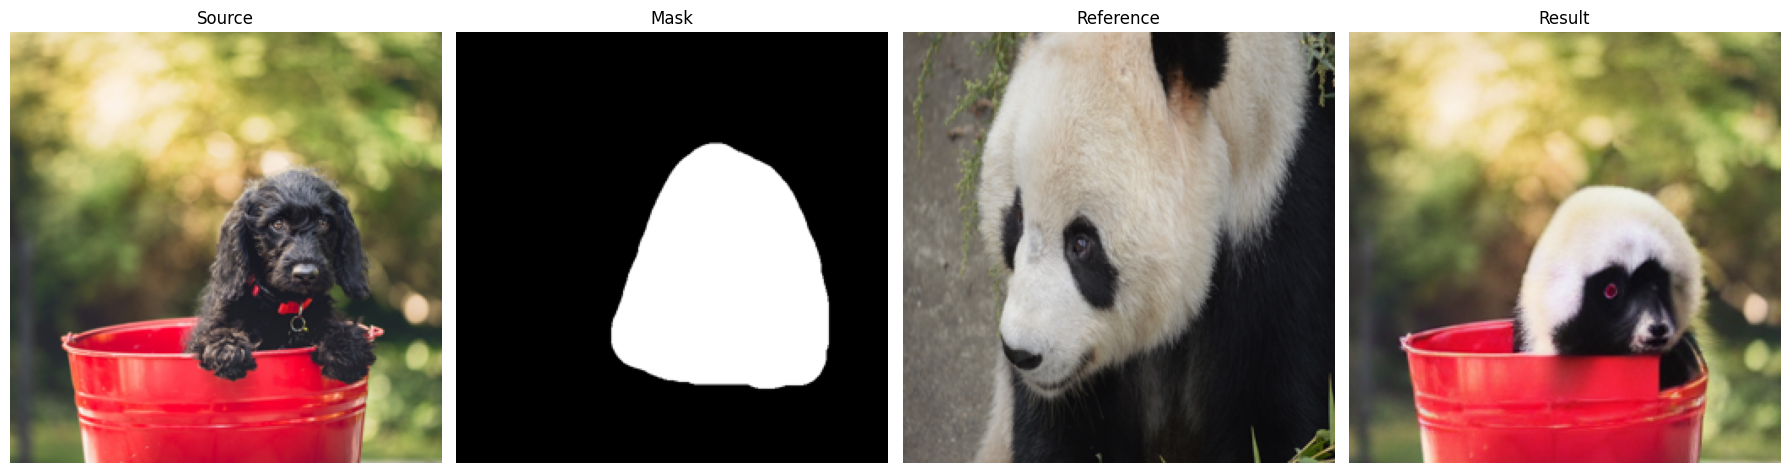

In [ ]:
import torch
from PIL import Image
import requests
from io import BytesIO
from diffusers import PaintByExamplePipeline
import matplotlib.pyplot as plt

def load_image(url, size=(256, 256)):  # smaller for faster preview
    response = requests.get(url)
    img = Image.open(BytesIO(response.content)).convert("RGB")
    return img.resize(size)

src_url = "https://raw.githubusercontent.com/Fantasy-Studio/Paint-by-Example/main/examples/image/example_1.png"
mask_url = "https://raw.githubusercontent.com/Fantasy-Studio/Paint-by-Example/main/examples/mask/example_1.png"
ref_url = "https://raw.githubusercontent.com/Fantasy-Studio/Paint-by-Example/main/examples/reference/example_1.jpg"

source_image = load_image(src_url)
mask_image = load_image(mask_url)
reference_image = load_image(ref_url)

if 'pipe' not in globals():
    pipe = PaintByExamplePipeline.from_pretrained(
        "Fantasy-Studio/Paint-by-Example",
        torch_dtype=torch.float16,
        cache_dir="/content/models"
    ).to("cuda")
    pipe.enable_xformers_memory_efficient_attention()

with torch.no_grad():
    result = pipe(
        image=source_image,
        mask_image=mask_image,
        example_image=reference_image,
                num_inference_steps=50,
                guidance_scale=7

    ).images[0]

fig, axs = plt.subplots(1, 4, figsize=(18, 5))
axs[0].imshow(source_image); axs[0].set_title("Source")
axs[1].imshow(mask_image); axs[1].set_title("Mask")
axs[2].imshow(reference_image); axs[2].set_title("Reference")
axs[3].imshow(result); axs[3].set_title("Result")
for ax in axs: ax.axis("off")
plt.tight_layout(); plt.show()
